In [1]:
import pandas as pd

## dataframe using dictionary

In [2]:
students = ["andi", "budi", "cindy"]
scores = [100, 90, 80]

exams = {"students" : students, "scores" : scores}

In [3]:
data_frame = pd.DataFrame(exams)
data_frame

,students,scores
0,andi,100
1,budi,90
2,cindy,80


## Dataframe using CSV

In [4]:
students = pd.read_csv("students.csv")
students

,no,nama,kelas,nilai
0,1,andi,11 KOM 1,100
1,2,budi,11 KOM 2,90
2,3,cindy,11 KOM 1,85


In [5]:
print(type(students))

<class 'pandas.core.frame.DataFrame'>


In [6]:
students.columns

Index(['no', 'nama', 'kelas', 'nilai'], dtype='object')

In [7]:
students.shape

(3, 4)

In [8]:
names = students["nama"]
print(names)
print(type(names))

0     andi
1     budi
2    cindy
Name: nama, dtype: object
<class 'pandas.core.series.Series'>


## Dataframe using numpy array

In [9]:
import numpy as np

In [10]:
data = np.array([[1, 3], [2, 4], [3, 5]])
df =pd.DataFrame(data,
                columns=["Number 1", "Number 2"])
df

,Number 1,Number 2
0,1,3
1,2,4
2,3,5


## Dataframe using external data (nsfg)

In [11]:
# pip install statadict 
from statadict import parse_stata_dict

data_file = "2015_2017_FemPregData.dat"
features_file = "2015_2017_FemPregSetup.dct"

nsfg = pd.read_fwf(data_file,
                   names= parse_stata_dict(features_file).names,
                   colspecs = parse_stata_dict(features_file).colspecs)
nsfg.head()

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,70627,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,3,322,1394,1382,1357,1345,1333,18,1,2016
1,70627,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3,322,1394,1382,1357,1345,1333,18,1,2016
2,70627,3,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,3,322,1394,1382,1357,1345,1333,18,1,2016
3,70628,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,366,1409,1397,1369,1357,1345,23,1,2017
4,70628,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,366,1409,1397,1369,1357,1345,23,1,2017


In [12]:
nsfg.tail()

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
9548,80712,5,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,4,309,1412,1400,1369,1357,1345,24,1,2017
9549,80712,6,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,4,309,1412,1400,1369,1357,1345,24,1,2017
9550,80712,7,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,4,309,1412,1400,1369,1357,1345,24,1,2017
9551,80712,8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,4,309,1412,1400,1369,1357,1345,24,1,2017
9552,80715,1,21.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,...,2,305,1409,1397,1369,1357,1345,23,1,2017


In [13]:
pounds = nsfg["BIRTHWGT_LB1"]
pounds.head()

0    7.0
1    NaN
2    9.0
3    6.0
4    7.0
Name: BIRTHWGT_LB1, dtype: float64

In [14]:
pounds.describe()

count    6690.000000
mean        8.008819
std        10.771360
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: BIRTHWGT_LB1, dtype: float64

In [15]:
pounds_clean = pounds.replace([98, 99], np.nan)

# pounds_clean.describe()
weight_p = pounds_clean * 0.453592
weight_p.describe()

count    6599.000000
mean        3.063722
std         0.627439
min         0.000000
25%         2.721552
50%         3.175144
75%         3.628736
max         6.350288
Name: BIRTHWGT_LB1, dtype: float64

In [16]:
ozs = nsfg["BIRTHWGT_OZ1"]

ozs_clean = ozs.replace([98, 99], np.nan)
# ozs_clean.describe
weight_o = ozs_clean * 0.0283495
weight_o.describe()

count    6540.000000
mean        0.192508
std         0.128489
min         0.000000
25%         0.085048
50%         0.198446
75%         0.311844
max         0.425242
Name: BIRTHWGT_OZ1, dtype: float64

In [17]:
pounds.value_counts()

BIRTHWGT_LB1
7.0     2268
6.0     1644
8.0     1287
5.0      570
9.0      396
4.0      179
99.0      89
10.0      82
3.0       76
2.0       46
1.0       28
11.0      17
0.0        2
12.0       2
98.0       2
13.0       1
14.0       1
Name: count, dtype: int64

In [18]:
words = ["and", "and", "or"]
series = pd.DataFrame(words)
series.value_counts()

and    2
or     1
Name: count, dtype: int64

In [19]:
series.value_counts().sort_index()

and    2
or     1
Name: count, dtype: int64

In [20]:
pounds_clean.value_counts().sort_index()

BIRTHWGT_LB1
0.0        2
1.0       28
2.0       46
3.0       76
4.0      179
5.0      570
6.0     1644
7.0     2268
8.0     1287
9.0      396
10.0      82
11.0      17
12.0       2
13.0       1
14.0       1
Name: count, dtype: int64

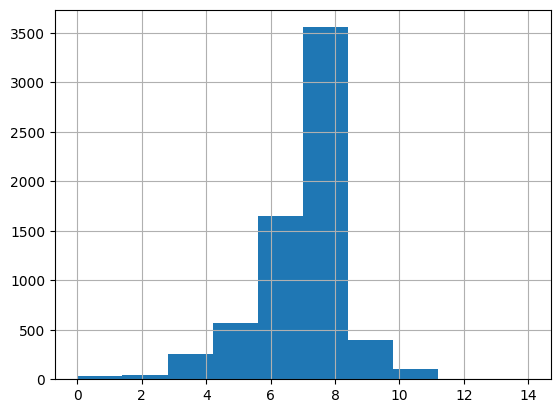

In [21]:
import matplotlib.pyplot as plt

data = pounds_clean.value_counts().sort_index()
pounds_clean.hist(bins=10)
# plt.xticks(list(range(0,15,3)))
plt.show()

## Boolean Series and Filtering Data

In [28]:
preterm = nsfg["PRGLNGTH"] < 37
preterm.sum()
preterm.mean() * 100

38.469590704490734

In [30]:
live = nsfg["OUTCOME"] == 1
live.mean() * 100

70.06176070344394

In [32]:
live_and_preterm = preterm & live
live_and_preterm.mean() * 100

8.929132209777034